<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters with the Iris Dataset

---

Below you will practice using K-Means clustering and the various evaluation strategies we covered on the famous Iris dataset.

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-format-the-data" data-toc-modified-id="Import-and-format-the-data-1">Import and format the data</a></span></li><li><span><a href="#Plot-the-data-to-visually-estimate-the-correct-number-of-clusters" data-toc-modified-id="Plot-the-data-to-visually-estimate-the-correct-number-of-clusters-2">Plot the data to visually estimate the correct number of clusters</a></span></li><li><span><a href="#Rescale-the-data-if-necessary" data-toc-modified-id="Rescale-the-data-if-necessary-3">Rescale the data if necessary</a></span></li><li><span><a href="#Cluster-the-data-using-K-Means" data-toc-modified-id="Cluster-the-data-using-K-Means-4">Cluster the data using K-Means</a></span></li><li><span><a href="#Check-the-centroids-and-plot-them-along-two-of-the-features" data-toc-modified-id="Check-the-centroids-and-plot-them-along-two-of-the-features-5">Check the centroids and plot them along two of the features</a></span></li><li><span><a href="#Compute-the-silhouette-score-for-your-clusters" data-toc-modified-id="Compute-the-silhouette-score-for-your-clusters-6">Compute the silhouette score for your clusters</a></span></li><li><span><a href="#Plot-the-silhouette-score-for-K-=-2,3,4,5,6,7,8" data-toc-modified-id="Plot-the-silhouette-score-for-K-=-2,3,4,5,6,7,8-7">Plot the silhouette score for K = 2,3,4,5,6,7,8</a></span></li><li><span><a href="#Plot-the-inertia-score-for-the-different-K-clusters" data-toc-modified-id="Plot-the-inertia-score-for-the-different-K-clusters-8">Plot the inertia score for the different K clusters</a></span></li><li><span><a href="#Fit-K-Means-with-3-clusters-and-pull-out-the-cluster-labels.-Pull-out-the-true-labels-as-well." data-toc-modified-id="Fit-K-Means-with-3-clusters-and-pull-out-the-cluster-labels.-Pull-out-the-true-labels-as-well.-9">Fit K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.</a></span></li><li><span><a href="#Calculate-the-completeness,-homogeneity-and-V-measure-scores-comparing-cluster-and-true-labels" data-toc-modified-id="Calculate-the-completeness,-homogeneity-and-V-measure-scores-comparing-cluster-and-true-labels-10">Calculate the completeness, homogeneity and V measure scores comparing cluster and true labels</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, homogeneity_completeness_v_measure, v_measure_score

### Import and format the data


- Use `sklearn.datasets.load_iris()`

In [15]:
from sklearn.datasets import load_iris

In [16]:
data = load_iris()

In [18]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Plot the data to visually estimate the correct number of clusters

In [24]:
iris = pd.DataFrame(data.data)


In [26]:
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Rescale the data if necessary

In [27]:
y = data.target

In [28]:
X = iris

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


### Cluster the data using K-Means

- Select a number of clusters of your choice based on your visual analysis above.
- Compute the labels and centroids.

In [ ]:
from sklearn.cluster import KMeans


In [30]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(Xstd)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [31]:
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)


Assigned cluster labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [32]:
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)


Location of centroids: 
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [33]:
Xstd['clusters'] = cluster_labels
Xstd.head()


,0,1,2,3,clusters
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


In [37]:
silhouette_score(X, labels)


0.6867350732769776

### Check the centroids and plot them along two of the features

How did your clustering perform?

Bonus: Color according to cluster labels and choose different symbols for each true class label.

In [38]:
from scikitplot.metrics import plot_silhouette

TypeError: '(slice(None, None, None), 0)' is an invalid key

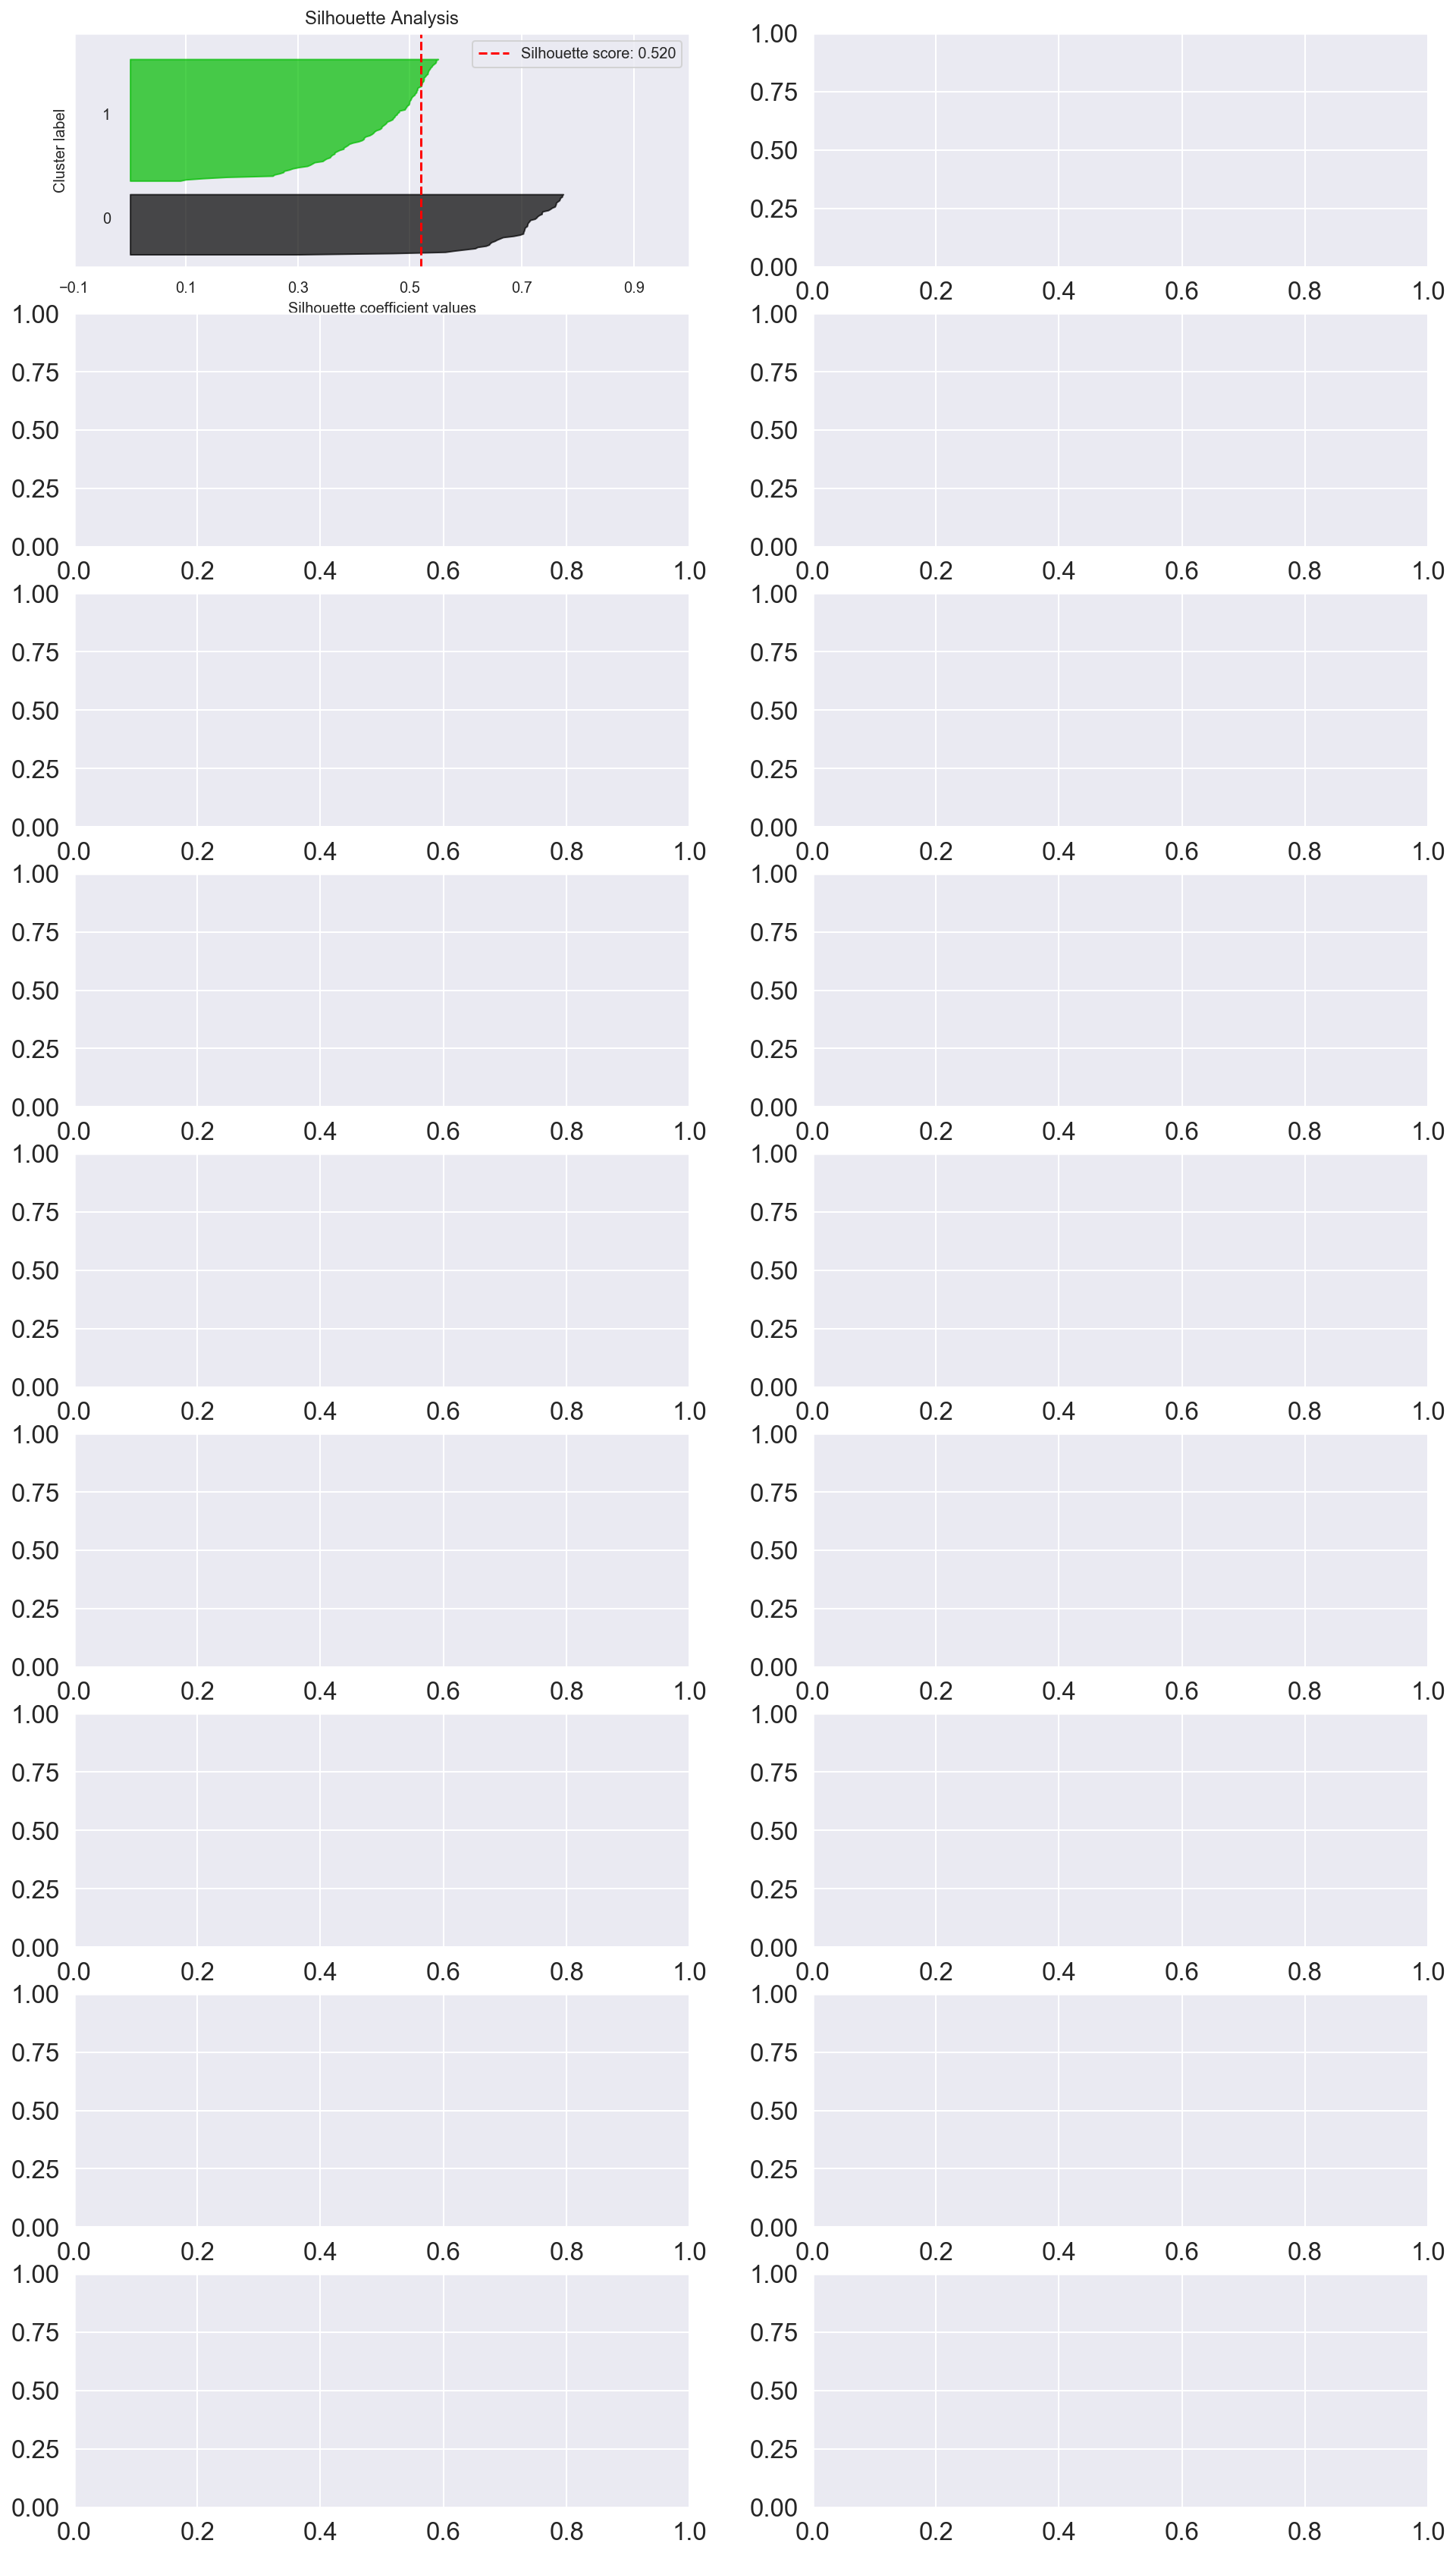

In [39]:
from matplotlib.colors import ListedColormap
silhouette = []
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 30))
for k in range(2, 11):
    
    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(Xstd)
    silhouette.append((k, silhouette_score(Xstd, labels)))
    
    cmap = ListedColormap(sns.color_palette("husl", n_colors=k))
    plot_silhouette(Xstd, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(Xstd[:,0], Xstd[:,1], color=cmap(labels))
silhouette = np.array(silhouette)


### Compute the silhouette score for your clusters

What does the score indicate?

In [40]:
silhouette_score(X, labels)


0.6867350732769776

### Plot the silhouette score for K = 2,3,4,5,6,7,8

You will need to fit a new model for each one. You can standardize your data before iterating through the clusters or not, up to you.

number of clusters:  2


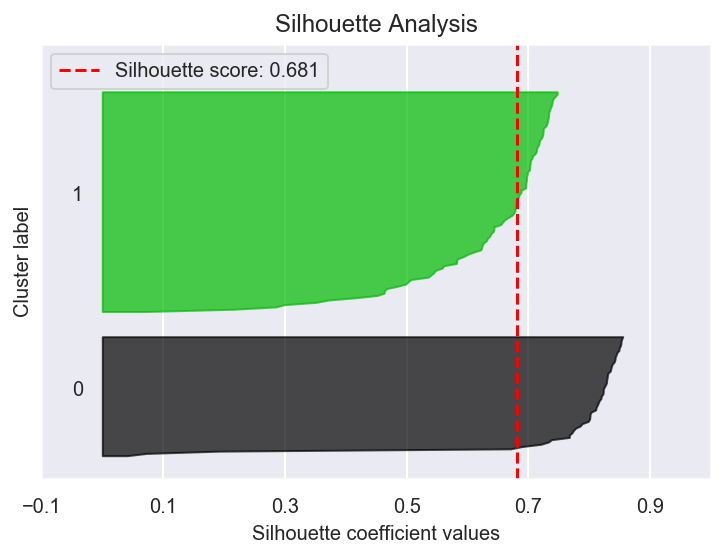

number of clusters:  3


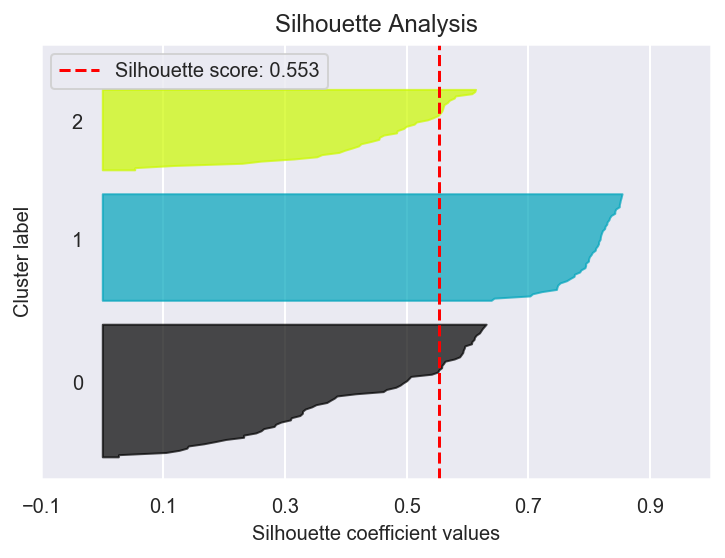

number of clusters:  4


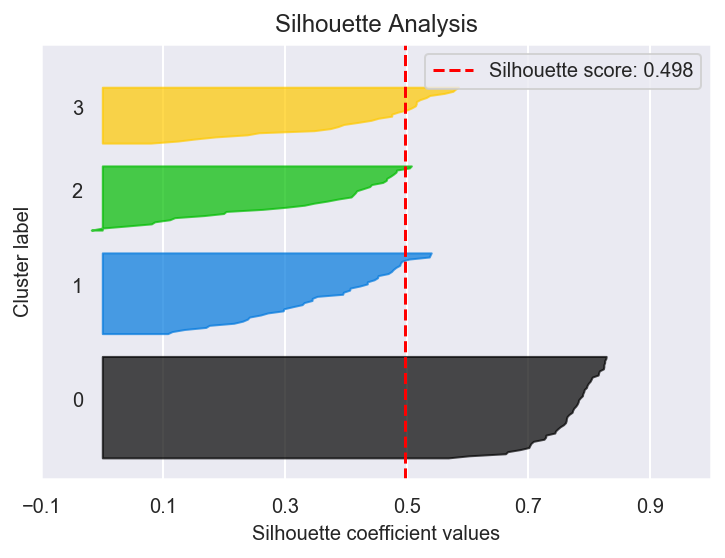

number of clusters:  5


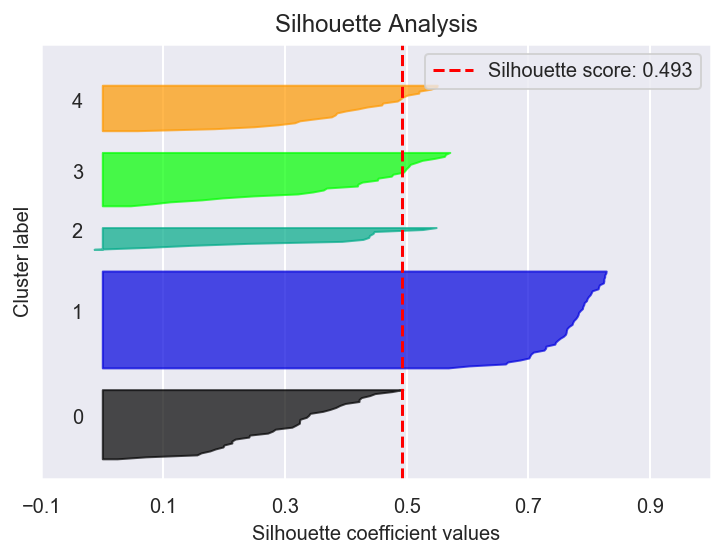

number of clusters:  6


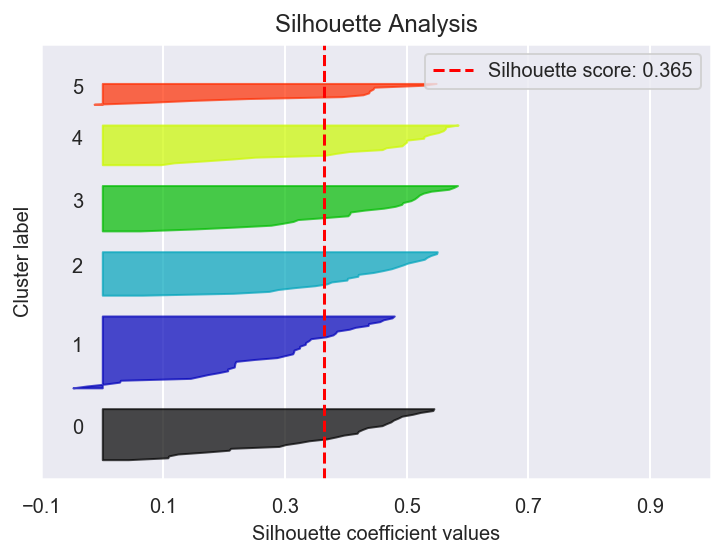

number of clusters:  7


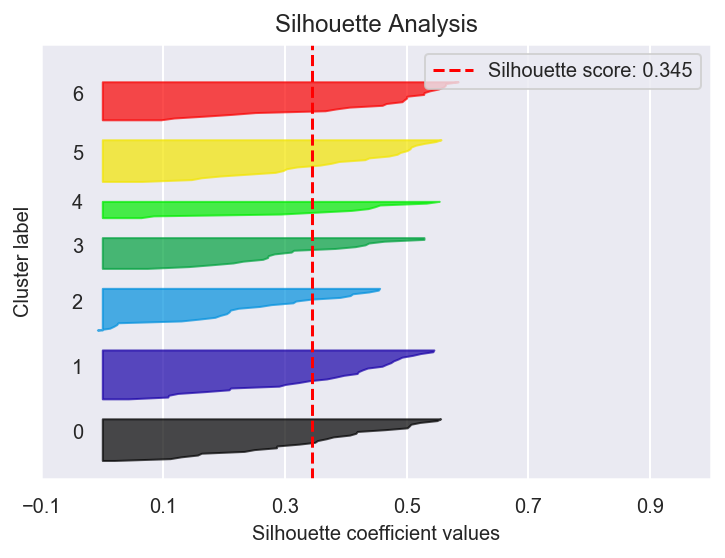

In [49]:
from scikitplot.metrics import plot_silhouette
for k in range(2, 8):
    print('number of clusters: ', k)
    model = KMeans(n_clusters=k)
    model.fit(X)
    labels = model.labels_
    plot_silhouette(X, labels)
    plt.show()


### Plot the inertia score for the different K clusters

Is there an "elbow" to select a good number of clusters or not?

Bonus: Do this by hand.

In [51]:
for k in range(2, 9):
    print('number of clusters: ', k)
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia = model.inertia_
    print(inertia)


number of clusters:  2
152.34795176035792
number of clusters:  3
78.85144142614601
number of clusters:  4
57.25600931571815
number of clusters:  5
46.44618205128205
number of clusters:  6
39.03998724608725
number of clusters:  7
34.40900974025974
number of clusters:  8
30.1865551948052


In [52]:
from scikitplot.cluster import plot_elbow_curve

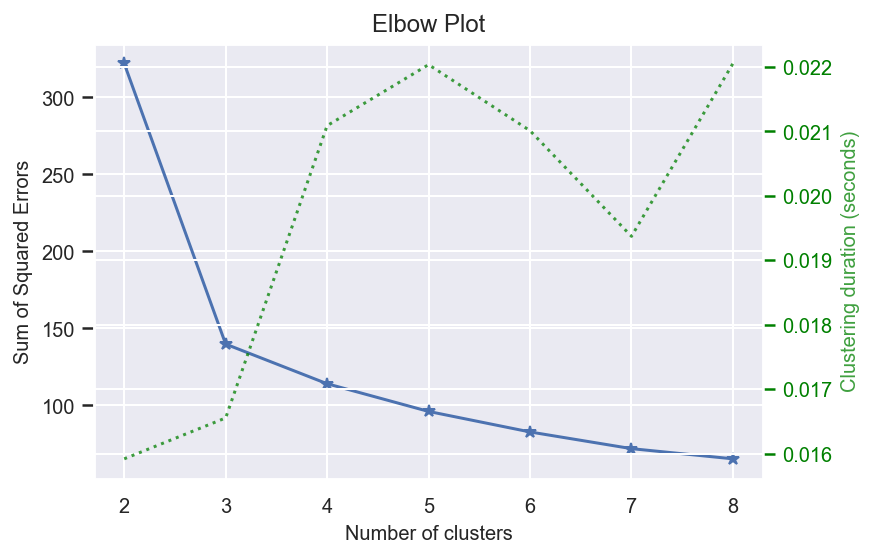

In [53]:
plot_elbow_curve(model, Xstd, cluster_ranges=range(2, 9))
plt.show()


### Fit K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster 0 should correspond roughly to species 0, cluster 1 to species 1, and cluster 2 to species 2.

In [54]:
iris = KMeans(n_clusters=3)
iris.fit(Xstd)
labels = iris.labels_

In [55]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Calculate the completeness, homogeneity and V measure scores comparing cluster and true labels

In [56]:
homogeneity_completeness_v_measure(y, labels)

(0.6591265018049008, 0.6598476779627759, 0.659486892724918)